In [5]:
import os
from src.analyzer import *
%matplotlib inline
output_dir = 'output/sparsity_new'

In [22]:
def plot_fill_between(t, data, label='', c = 'r'):
    """
    t : array, shape (timesteps, )
        Times for each data point
    data : array, shape (samples, timesteps)
        Data to plot mean and +/- one sdev as a function of time
    """
    mm = data.mean(0)
    sd = data.std(0)
    plt.fill_between(t, mm-sd, mm + sd, alpha=0.5, color=c)
    plt.plot(t, mm, color=c, label=label)

In [35]:
pkl_fns = [os.path.join(output_dir, fn) 
           for fn in os.listdir(output_dir) 
           if fn.endswith('.pkl')]
pkl_fns.sort()
pkl_fns;

In [7]:
snr_list_ = [DataAnalyzer.fromfilename(pkl_fn).SNR_list() for pkl_fn in pkl_fns]

In [30]:
slice_ = [slice(20, 40), slice(40, 60), slice(0, 20)]
label_ = ['Sparse Prior', 'Pos-Only PCA', 'Independent Pixel Prior']
c_ = ['g', 'r', 'b']

In [31]:
da = DataAnalyzer.fromfilename(pkl_fns[-1])
t = da.time_list()

In [32]:
# SNRs for each trial, grouped
group_snr_ = [np.array(snr_list_[sli]) for sli in slice_]

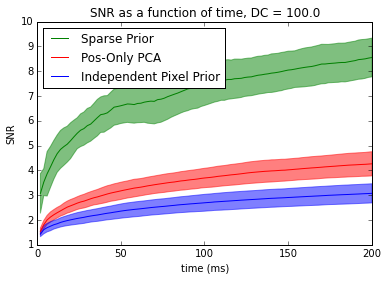

In [33]:
# plot_fill_between(t, snr_sp, c = 'g', label='Sparse Prior')
# plot_fill_between(t, snr_id, c = 'b', label='Independent Pixel Prior')
for group_snr, label, c in zip(group_snr_, label_, c_):
    plot_fill_between(t, group_snr, c = c, label=label)
plt.xlabel('time (ms)')
plt.ylabel('SNR')
plt.title('SNR as a function of time, DC = {}'.format(100.))
plt.legend(loc='upper left')
plt.savefig(os.path.join(output_dir, 'sparse_compare.png'), dpi=200)

In [36]:
da_ = [DataAnalyzer.fromfilename(pkl_fn) for pkl_fn in pkl_fns]

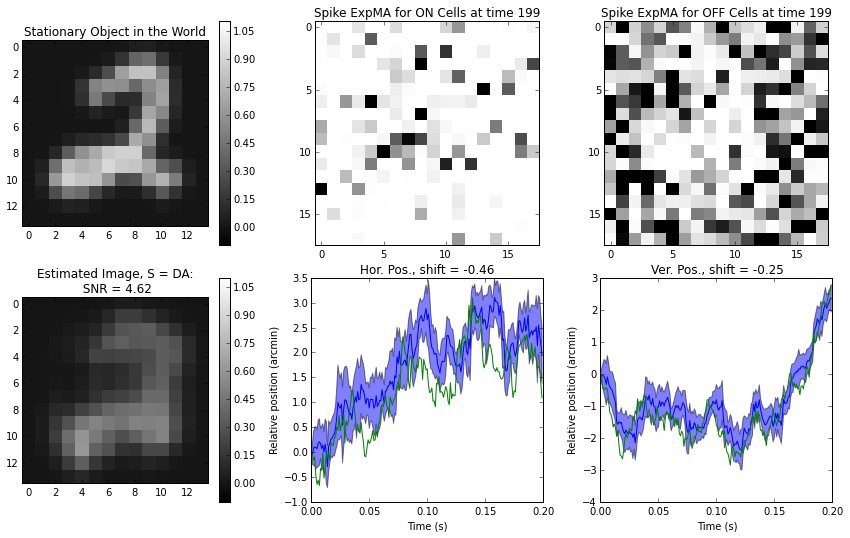

In [38]:
da_[-1].plot_EM_estimate(-1)
plt.savefig(os.path.join(output_dir, 'sparse_example.png'))